In [1]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV,calibration_curve
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
X, y = make_classification(n_samples=9000,n_features=20,class_sep=0.5)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)

In [16]:
clf = LinearSVC()
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [17]:
ccv_sig = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
ccv_sig.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv='prefit', method='sigmoid')

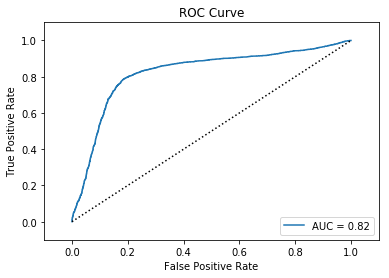

In [20]:
plt.clf()

y_preds = ccv_sig.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well

discrete_preds = clf.predict(X_test)

ccv_preds_sig = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, ccv_preds_sig)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'k:')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [23]:
fig,axes = plt.subplots(1,3,sharey=True)

y_preds = clf.predict_proba(X_test)

clf_preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, clf_preds)

auc_score = metrics.auc(fpr, tpr)

axes[0].set_title('ROC Curve - original classifier')
axes[0].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[0].plot([0,1],[0,1],'k:')

axes[0].set_xlim([-0.1,1.1])
axes[0].set_ylim([-0.1,1.1])
axes[0].set_ylabel('True Positive Rate')
axes[0].set_xlabel('False Positive Rate')

axes[0].legend(loc='lower right')


## CCV sigmoid

y_preds = ccv_sig.predict_proba(X_test)

ccv_preds_sig = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, ccv_preds_sig)

auc_score = metrics.auc(fpr, tpr)

axes[1].set_title('ROC Curve - Calibrated classifier')
axes[1].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[1].plot([0,1],[0,1],'k:')

axes[1].set_xlim([-0.1,1.1])
axes[1].set_ylim([-0.1,1.1])
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')

axes[1].legend(loc='lower right')


## CCV isotonic

y_preds = ccv_iso.predict_proba(X_test)

ccv_preds_iso = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, ccv_preds_iso)

auc_score = metrics.auc(fpr, tpr)

axes[2].set_title('ROC Curve - Calibrated classifier')
axes[2].plot(fpr, tpr, label='AUC = {:.5f}'.format(auc_score))

axes[2].plot([0,1],[0,1],'k:')

axes[2].set_xlim([-0.1,1.1])
axes[2].set_ylim([-0.1,1.1])
axes[2].set_ylabel('True Positive Rate')
axes[2].set_xlabel('False Positive Rate')

axes[2].legend(loc='lower right')


plt.gcf().set_size_inches(15,5)
plt.show()

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

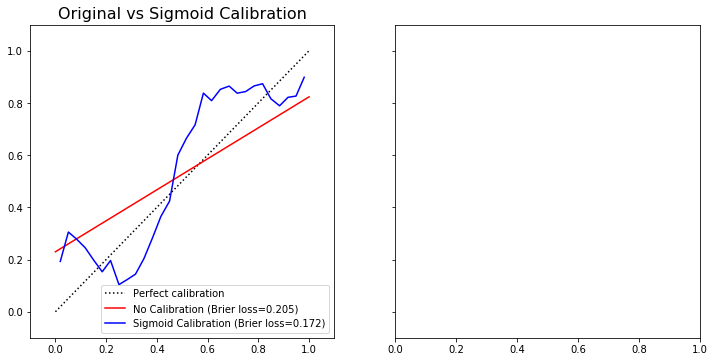

In [22]:
plt.clf()

fig, axes = plt.subplots(1,2,sharey=True)

ax=axes[0]

ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])

ax.plot([0, 1], [0, 1], "k:", label="Perfect calibration")

clf_score = brier_score_loss(y_test, discrete_preds, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, discrete_preds, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "r-", label="No Calibration (Brier loss={:.3f})".format(clf_score))

clf_score = brier_score_loss(y_test, ccv_preds_sig, pos_label=1)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, ccv_preds_sig, n_bins=30)
ax.plot(mean_predicted_value, fraction_of_positives, "b-", label="Sigmoid Calibration (Brier loss={:.3f})".format(clf_score))

ax.legend(loc='lower right')
ax.set_title('Original vs Sigmoid Calibration', size=16)
plt.subplots_adjust(top=0.85)


plt.gcf().set_size_inches(12,6)
plt.show()